<a href="https://colab.research.google.com/github/suryakiran594/DS/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing    #importing problem statement

In [2]:
dataset=fetch_california_housing()

In [3]:
print(dataset.DESCR)   # Describe the data- Key which has all the information

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
# Creating a Data Frame

import pandas as pd
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
df['Price']=dataset.target   #Inclusion of target columns

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.describe()   #Descriptive Statistics with respect to other values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
  df.isnull().sum()  #checking for null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [14]:
import seaborn as sns

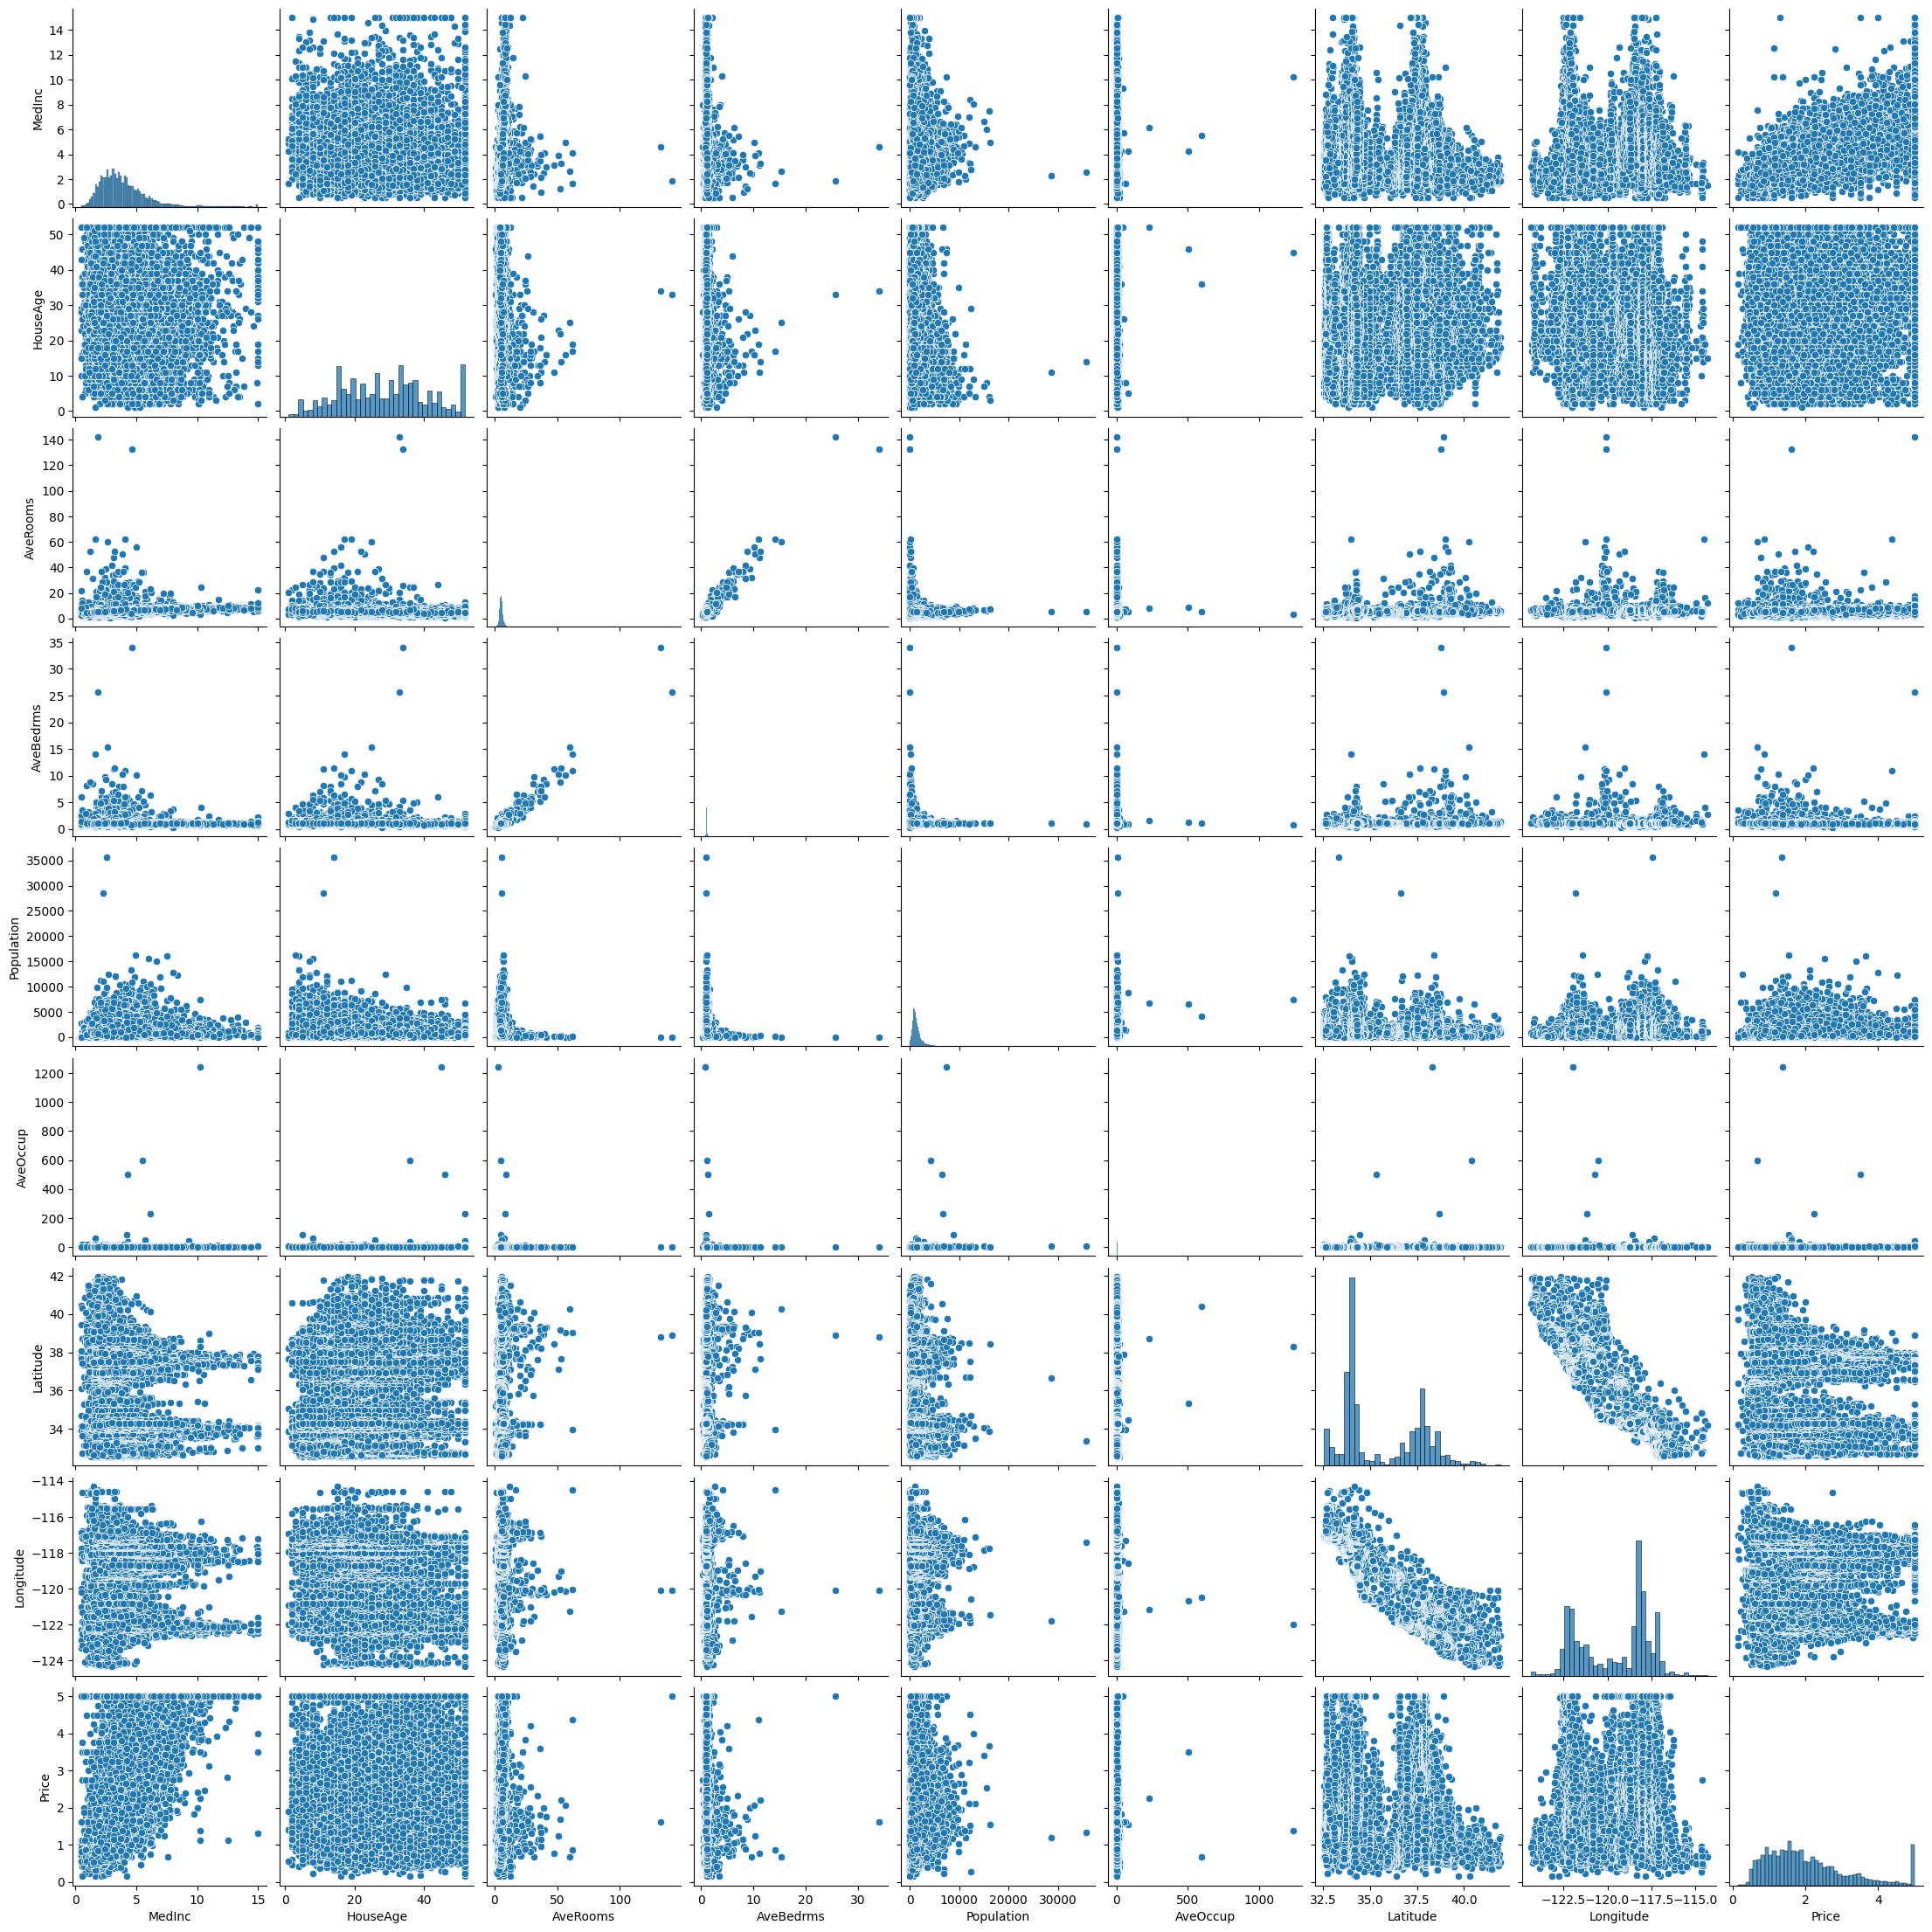

In [15]:
sns.pairplot(df)    # pairplot creation

In [16]:
df_copy=df.sample(frac=0.25)

In [17]:
df_copy.shape


(5160, 9)

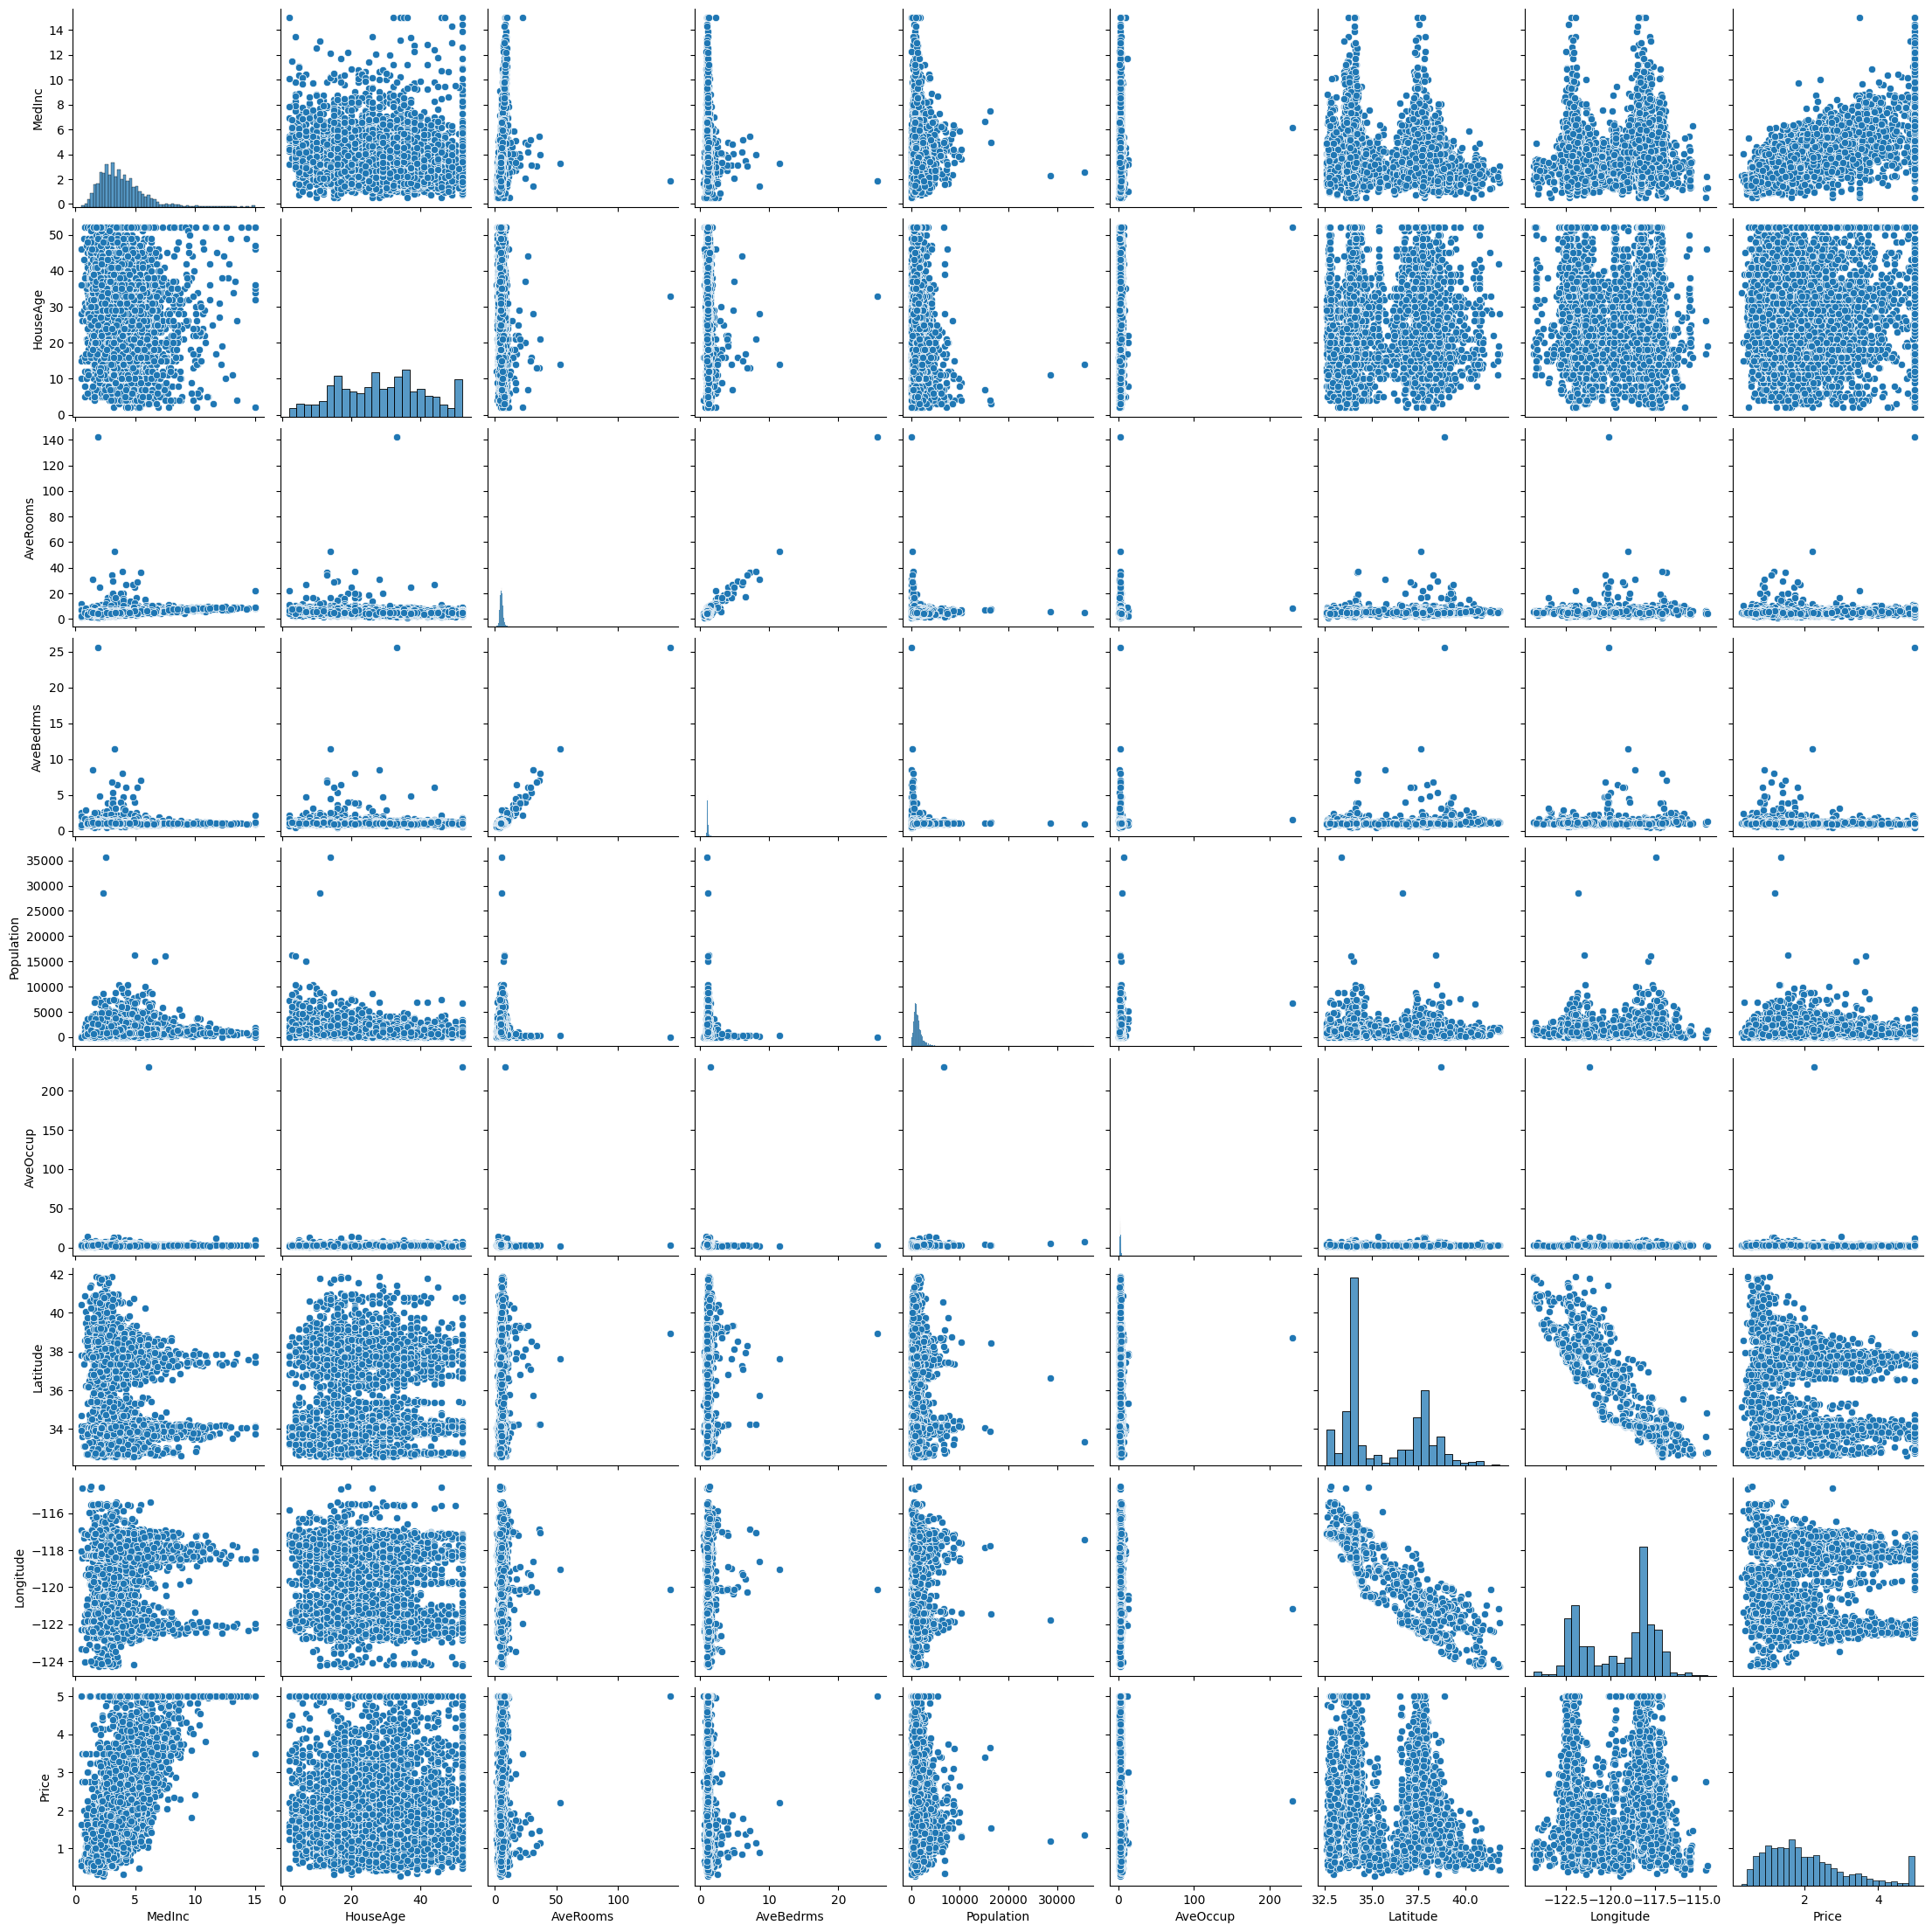

In [18]:
sns.pairplot(df_copy)

In [19]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [119]:
from sklearn.model_selection import train_test_split

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=36)

In [122]:
X.shape

(20640, 8)

In [123]:
X_train.shape,X_test.shape

((13828, 8), (6812, 8))

In [124]:
X_train.head()     # Train Module

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6556,9.5320,50.0,7.114428,0.925373,620.0,3.084577,34.19,-118.11
8399,2.8438,32.0,3.851986,1.032491,1053.0,3.801444,33.95,-118.37
17929,3.9250,35.0,5.056680,0.939271,556.0,2.251012,37.35,-121.97
19277,2.1864,29.0,4.031627,1.040663,1880.0,2.831325,38.43,-122.73
11910,3.8640,24.0,5.444714,1.094775,2398.0,2.913730,33.96,-117.41


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()   # CREATION OF STANDARD SCALER OBJECT

In [127]:
scaler.fit(X_train)  # TO COMPUTE MEAN AND STANDAR/D DEVIATION

StandardScaler()

In [128]:
X_train=scaler.fit_transform(X_train)

In [129]:
X_train


array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
regression=LinearRegression()

In [132]:
regression.fit(X_train,y_train)

LinearRegression()

In [133]:
regression.coef_


array([ 0.83700024,  0.12271899, -0.26347102,  0.30713139, -0.0081633 ,
       -0.02764702, -0.90609856, -0.87576409])

In [134]:
regression.intercept_

2.0708259184263804

In [151]:
## prediction
y_pred=regression.predict(X_test.values)

In [152]:
  from sklearn.metrics import mean_squared_error,mean_absolute_error

In [153]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

4491.028790738014
66.4052544335324
67.01513851912875


In [154]:
## Accuracy r2 and adjusted r square
from sklearn.metrics import r2_score

In [155]:
score=r2_score(y_test,y_pred)

In [156]:
score

-3471.0940064366514

In [157]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

-3472.4403663829207

In [158]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=20.0)
ridge.fit(X_train,y_train)

Ridge(alpha=20.0)

In [161]:
y_pred=ridge.predict(X_test.values)

In [162]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

4414.402121039063
65.90785219983175
66.4409671892204


In [163]:
from sklearn.linear_model import Lasso

In [164]:
lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [167]:
y_pred=lasso.predict(X_test.values)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


In [168]:
from sklearn.linear_model import ElasticNet

In [169]:
elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [171]:
y_pred=elasticnet.predict(X_test.values)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


In [172]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.137870,0.299441,-0.059815,0.007636,0.004919,-0.097209,0.007674,0.690639
HouseAge,-0.137870,1.000000,-0.132378,-0.064892,-0.272981,0.024090,0.008583,-0.098827,0.079227
AveRooms,0.299441,-0.132378,1.000000,0.875630,-0.056495,0.006600,0.099178,-0.031072,0.161144
AveBedrms,-0.059815,-0.064892,0.875630,1.000000,-0.056330,-0.001382,0.069630,0.002903,-0.024660
Population,0.007636,-0.272981,-0.056495,-0.056330,1.000000,0.104119,-0.087416,0.078641,-0.030298
AveOccup,0.004919,0.024090,0.006600,-0.001382,0.104119,1.000000,-0.013044,0.022637,-0.054979
Latitude,-0.097209,0.008583,0.099178,0.069630,-0.087416,-0.013044,1.000000,-0.925549,-0.159015
Longitude,0.007674,-0.098827,-0.031072,0.002903,0.078641,0.022637,-0.925549,1.000000,-0.025049
Price,0.690639,0.079227,0.161144,-0.024660,-0.030298,-0.054979,-0.159015,-0.025049,1.000000
